## Barkely and Astoria

* Barkley ans Astoria's bathymetries
* Particular features
* Thalweg shape
* Keep in mind for the lab canyon ...

In [23]:
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import seaborn as sns
from netCDF4 import Dataset

%matplotlib inline


SouthVIgrid.mat gives lat shape 1474, lon shape 890 and dpth shape (890,1474)

In [4]:
def get_topo():
     topo=sio.loadmat('/ocean/kramosmu/FalkorData/SouthVIgrid.mat')

     tDat = {'lon' : [], 'lat' : [], 'dpth' : []}

     tDat['lon'] = np.squeeze(np.array(topo['SouthVIgrid']['lon'][0][0]))
     tDat['lat'] = np.squeeze(np.array(topo['SouthVIgrid']['lat'][0][0]))
     tDat['dpth'] = np.squeeze(np.array(topo['SouthVIgrid']['depth'][0][0]))

     return tDat

In [15]:
astoria_file = '/ocean/kramosmu/MultipleCanyons/data/gebco_bathy_Astoria/GEBCO_2014_Astoria.nc'

with Dataset(astoria_file, 'r') as nbl:
    dep_Ast = nbl.variables['elevation'][:]
    lon_Ast = nbl.variables['lon'][:]
    lat_Ast = nbl.variables['lat'][:]


(194, 320)

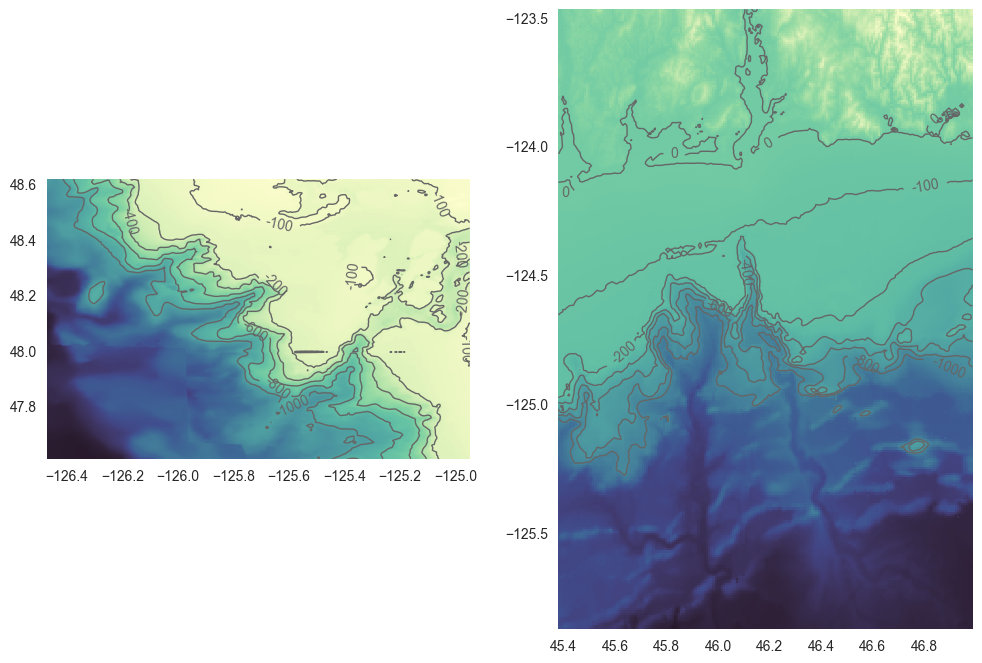

In [36]:
tDat = get_topo()

plt.rcParams['contour.negative_linestyle'] = 'solid'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

ax1.pcolor(tDat['lon'][450:900],tDat['lat'][50:500],tDat['dpth'][50:500,450:900],cmap=cmo.cm.deep_r)
CS = ax1.contour(tDat['lon'][450:900],tDat['lat'][50:500],tDat['dpth'][50:500,450:900],
                 [-1000, -800, -600, -400, -200, -100, 0],colors='0.4',linewidths=[1])
ax1.clabel(CS, inline=1, fontsize=10,fmt='%1.0f')
ax1.set_aspect(1)

ax2.pcolor(lat_Ast,lon_Ast[15:-15],np.fliplr(np.transpose(dep_Ast[:,15:-15])),cmap=cmo.cm.deep_r)
CS2 = ax2.contour(lat_Ast,lon_Ast[15:-15],np.fliplr(np.transpose(dep_Ast[:,15:-15])),[-1000, -800, -600, -400, -200, -100, 0],colors='0.4',
                  linewidths=[1] )
ax2.clabel(CS2, inline=1, fontsize=10,fmt='%1.0f')
ax2.set_aspect(1)